<code><h3>Practical Statistics for Data Scientists</h3></code>

<code>Exploratory Data Analysis</code>

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.DataFrame(
    {'State':['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware'], 
    'Population':[4779736, 710231, 6392017, 2915918, 37253956, 5029196, 3574097, 897934],
    'Murder_rate':[5.7, 5.6, 4.7, 5.6, 4.4, 2.8, 2.4, 5.8],
    'Abbreviation':['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE']
    }
    )
data

,State,Population,Murder_rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


Location Estimates:

<code>Mean, trimmed mean and median</code>

In [4]:
# Mean
data['Population'].mean()

7694135.625

<code>7694135.625</code> is the mean number of books in the <code>Population</code> column

In [5]:
from scipy.stats import trim_mean

In [6]:
# trimmed mean
trim_mean(data['Population'], 0.15)

3931483.0

In [7]:
# median
data['Population'].median()

4176916.5

<code>Weighted Mean</code>

In [8]:
np.average(data['Murder_rate'], weights=data['Population'])

4.376359279149048

<code>Weighted Median</code>

In [9]:
import weighted
weighted.median(data['Murder_rate'], weights=data['Population'])

4.448750497554494

<code>Estimates of Variability</code>

Variance

In [10]:
from statistics import variance

variance(data['Murder_rate'])

1.825

<code>Standard Deviation</code>

In [11]:
data['Murder_rate'].std() # √variance

1.3509256086106296

<code>Percentile</code>

In [12]:
np.percentile(data['Population'], 75)

5369901.25

<code>Mean absolute deviation</code>

In [13]:
from numpy import mean, absolute

mean(absolute(data['Population'] - mean(data['Population'])))

7389955.09375

In [14]:
data.describe()

,Population,Murder_rate
count,8.000000e+00,8.000000
mean,7.694136e+06,4.625000
std,1.210575e+07,1.350926
min,7.102310e+05,2.400000
25%,2.411422e+06,4.000000
50%,4.176916e+06,5.150000
75%,5.369901e+06,5.625000
max,3.725396e+07,5.800000


<code><h3>Exploring the Data Distribution</h3></code>

<code>Percentiles and Boxplots</code>

<code>Interquartile Range - IQR</code>

In [15]:
q3, q1 = np.percentile(data['Population'], [75, 25])
iqr = q3 - q1
iqr

2958479.25

<code>Percentiles</code> of<code> Murder rate</code> by <code>state</code>

In [23]:
from numpy import quantile

data['Murder_rate'].quantile([0.25, 0.5, 0.75])
# np.quantile(data['Murder_rate'], [0.25, 0.5, 0.75])

# np.percentile(data['Murder_rate'], 50)

5.15

<code>Boxplot</code>

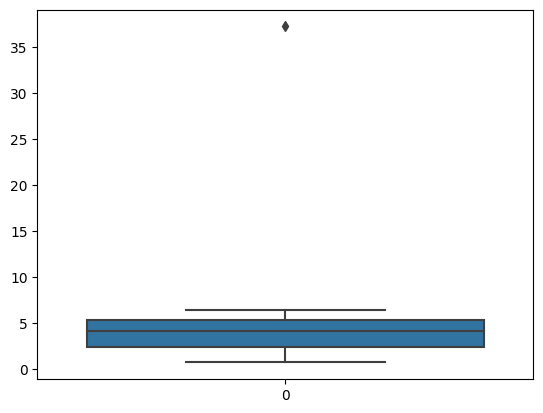

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.boxplot(y='Population', data=data)
# plt.show()

sns.boxplot(data['Population']/1000000)
plt.show()

Text(0, 0.5, 'Population (millions)')

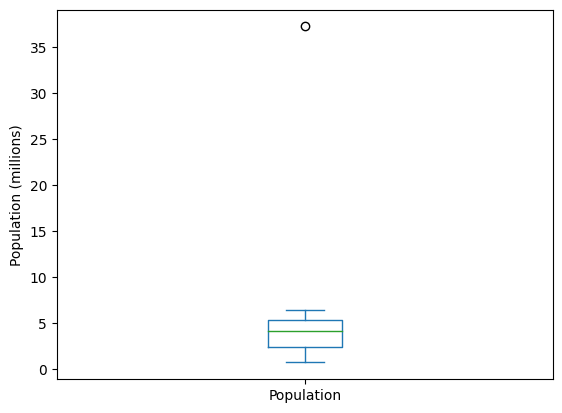

In [34]:
ax = (data['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

<code>Frequency Table</code>

In [38]:
binnedPopulation = pd.cut(data['Population'], 10)
binnedPopulation.value_counts()

(673687.275, 4364603.5]     4
(4364603.5, 8018976.0]      3
(33599583.5, 37253956.0]    1
(8018976.0, 11673348.5]     0
(11673348.5, 15327721.0]    0
(15327721.0, 18982093.5]    0
(18982093.5, 22636466.0]    0
(22636466.0, 26290838.5]    0
(26290838.5, 29945211.0]    0
(29945211.0, 33599583.5]    0
Name: Population, dtype: int64

In [39]:
data.State.value_counts()

Alabama        1
Alaska         1
Arizona        1
Arkansas       1
California     1
Colorado       1
Connecticut    1
Delaware       1
Name: State, dtype: int64

In [40]:
data['State'].value_counts()

Alabama        1
Alaska         1
Arizona        1
Arkansas       1
California     1
Colorado       1
Connecticut    1
Delaware       1
Name: State, dtype: int64

In [43]:
pd.cut(data['Population'], 10).value_counts()

(673687.275, 4364603.5]     4
(4364603.5, 8018976.0]      3
(33599583.5, 37253956.0]    1
(8018976.0, 11673348.5]     0
(11673348.5, 15327721.0]    0
(15327721.0, 18982093.5]    0
(18982093.5, 22636466.0]    0
(22636466.0, 26290838.5]    0
(26290838.5, 29945211.0]    0
(29945211.0, 33599583.5]    0
Name: Population, dtype: int64

<code>Histogram</code>

(array([4., 3., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 0.710231 ,  4.3646035,  8.018976 , 11.6733485, 15.327721 ,
        18.9820935, 22.636466 , 26.2908385, 29.945211 , 33.5995835,
        37.253956 ]),
 <BarContainer object of 10 artists>)

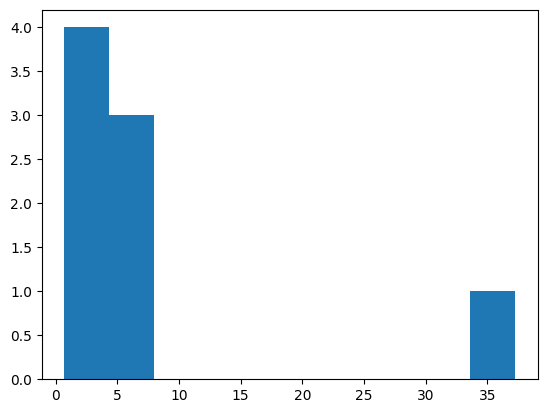

In [79]:
plt.hist(x=data['Population']/1000000)

Text(0.5, 0, 'Population (millions)')

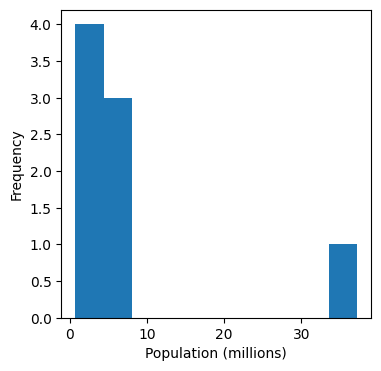

In [83]:
ax = (data['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')


Text(0.5, 1.0, 'Histogram of data Population')

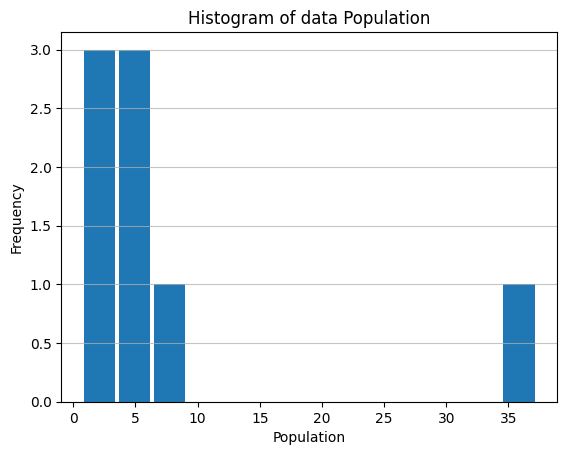

In [106]:
plt.hist(x=data['Population']/1000000, bins='auto', rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram of data Population')

<code>Density Plots and Estimate</code>

Text(0.5, 0, 'Murder Rate (per 100,000)')

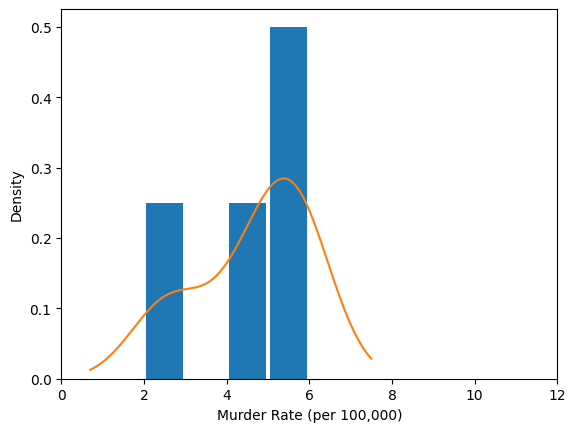

In [112]:
ax = data['Murder_rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12), rwidth=0.9)
data['Murder_rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

<code>Exploring Binary and Categorical Data</code>

<code>Mode</code>

In [115]:
data['State'].mode()

0        Alabama
1         Alaska
2        Arizona
3       Arkansas
4     California
5       Colorado
6    Connecticut
7       Delaware
Name: State, dtype: object

<code>Bar Charts</code>

Text(0, 0.5, 'Population')

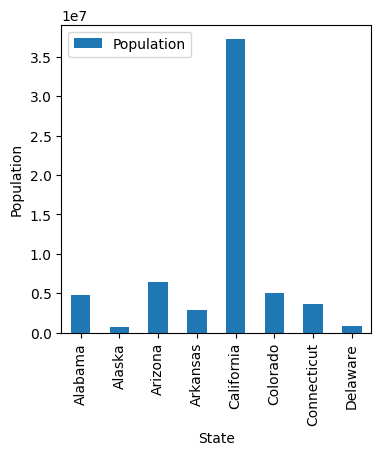

In [121]:
ax = data.plot.bar(x='State', y='Population', figsize=(4, 4), legend=True)
ax.set_xlabel('State')
ax.set_ylabel('Population')

<code>Correlation</code>

In [122]:
data.corr()

C:\Users\rmans\AppData\Local\Temp\ipykernel_16452\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Population,Murder_rate
Population,1.000000,-0.133691
Murder_rate,-0.133691,1.000000


<code>Scatter Plot</code>

<AxesSubplot: xlabel='State', ylabel='Population'>

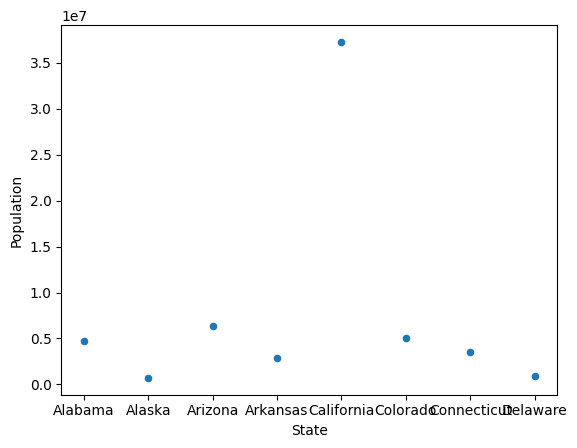

In [124]:
data.plot.scatter(x='State', y='Population')

<code>Hexagonal Binning</code>

<AxesSubplot: xlabel='Murder_rate', ylabel='Population'>

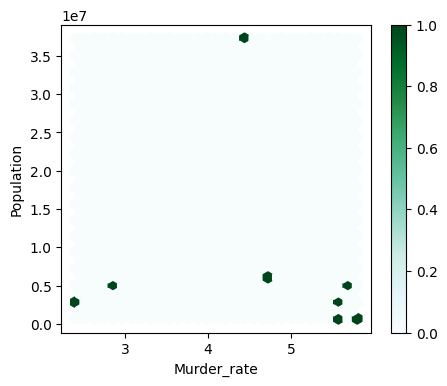

In [132]:
data.plot.hexbin(x='Murder_rate', y='Population', gridsize=30, sharex=False, figsize=(5, 4))


<code>Contour Plot</code>

C:\Users\rmans\AppData\Local\Temp\ipykernel_16452\3385077667.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['Population']/1000000, y=data['Murder_rate'], cmap="Reds", shade=True, bw_adjust=.5)


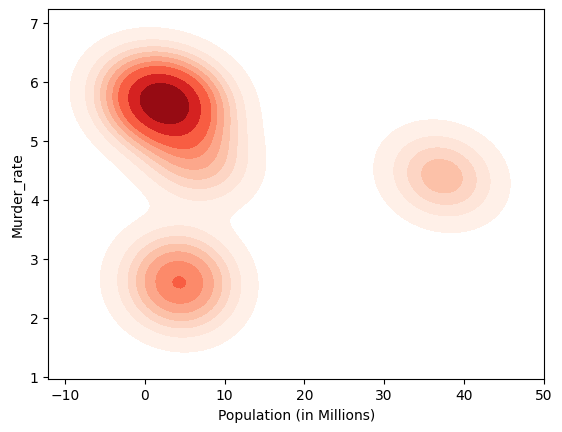

In [139]:
# custom the color, add shade and bandwidth
sns.kdeplot(x=data['Population']/1000000, y=data['Murder_rate'], cmap="Reds", shade=True, bw_adjust=.5)
plt.xlabel('Population (in Millions)')
plt.show()

<code>Heatmap</code>

C:\Users\rmans\AppData\Local\Temp\ipykernel_16452\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

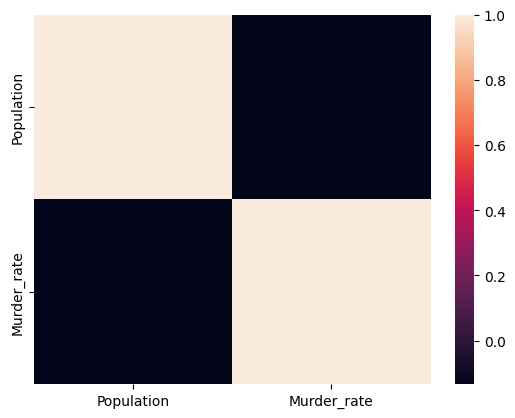

In [140]:
sns.heatmap(data.corr())

<code>Contingency Table</code>

In [143]:
crosstab = data.pivot_table(index='Murder_rate', columns='Population',
 aggfunc=lambda x: len(x), margins=True)


<code>Violin Plot</code>

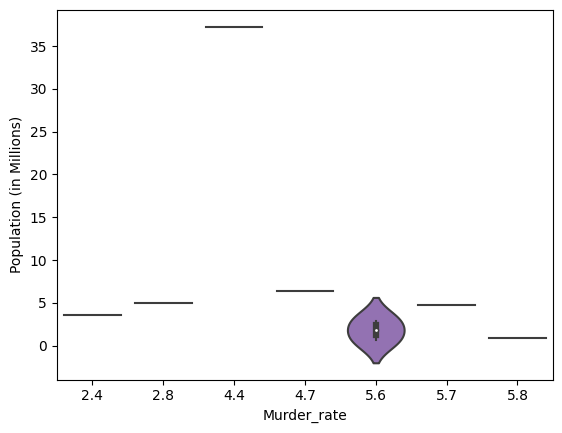

In [151]:
sns.violinplot(x='Murder_rate', y=data['Population']/1000000, data=data, figsize=3)
plt.ylabel('Population (in Millions)')
plt.show()